<a href="https://colab.research.google.com/github/Twixx10/MachineLearningTASK/blob/main/Week7/Tugas_XGBOOST_M_Rakan_Bagus_1103213162ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##TUGAS XGBOOST

1. Mengakses Google Drive dan Membaca Dataset

In [2]:
# Mengimpor modul yang diperlukan
import pandas as pd  # Untuk manipulasi data
from google.colab import drive  # Modul untuk mengakses Google Drive

# Mount Google Drive untuk mengakses file di dalamnya
drive.mount('/content/drive')  # Menghubungkan Google Drive ke Colab



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Mempersiapkan Data untuk XGBoost

In [3]:
# Menentukan path ke file CSV
file_path = '/content/drive/MyDrive/Machine Learning/Dataset/tugasxgboost.csv'  # Ganti dengan path file Anda

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(file_path)  # Membaca data dari file CSV

# Menampilkan beberapa baris pertama dari DataFrame untuk memastikan data sudah ter-load dengan benar
data.head()  # Menampilkan 5 baris pertama dari dataset

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,Class
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5


Insights:
Dengan menggunakan data.head(), kita dapat melihat struktur awal dari dataset, termasuk kolom dan beberapa nilai yang ada, yang membantu kita memahami data yang akan kita olah.

3. Melatih Model XGBoost

In [5]:
# Mengimpor library yang diperlukan untuk XGBoost
import xgboost as xgb  # Library untuk XGBoost
from sklearn.model_selection import train_test_split  # Untuk membagi dataset
from sklearn.metrics import mean_squared_error  # Untuk evaluasi model

# Memisahkan fitur dan target
X = data.drop('Class', axis=1)  # Menghapus kolom 'Class' dari DataFrame untuk fitur
y = data['Class']  # Menentukan kolom target sebagai 'Class'

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80% data untuk latih, 20% untuk uji

Insights:
Dengan membagi dataset, kita dapat melatih model pada satu bagian data dan mengujinya pada bagian lain, yang membantu kita mengevaluasi performa model secara objektif.

4. Evaluasi Model

In [7]:
# Mengatur parameter untuk model XGBoost
params = {
    'objective': 'reg:squarederror',  # Untuk regresi
    'max_depth': 5,  # Kedalaman maksimum pohon
    'learning_rate': 0.1,  # Laju pembelajaran
    'n_estimators': 100  # Jumlah pohon
}

# Membuat model XGBoost
model = xgb.XGBRegressor(**params)  # Menggunakan parameter yang telah ditentukan

# Melatih model dengan data latih
model.fit(X_train, y_train)  # Melatih model dengan data latih

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Insights:
Melatih model dengan data latih memungkinkan kita untuk membangun model yang dapat memprediksi nilai target berdasarkan fitur yang ada.



In [8]:
# Memprediksi nilai target pada data uji
y_pred = model.predict(X_test)  # Memprediksi dengan model yang telah dilatih

# Menghitung Mean Squared Error (MSE) untuk evaluasi
mse = mean_squared_error(y_test, y_pred)  # Menghitung MSE
print(f'Mean Squared Error: {mse}')  # Menampilkan MSE

Mean Squared Error: 0.3500637714225284


Mean Squared Error (MSE) adalah metrik yang umum digunakan untuk mengevaluasi performa model regresi. Semakin kecil nilai MSE, semakin baik model dalam memprediksi nilai target.
Insights:
Dengan menghitung MSE, kita dapat menilai seberapa baik model kita dalam memprediksi data yang belum pernah dilihat sebelumnya.

5. Visualisasi Feature Importance

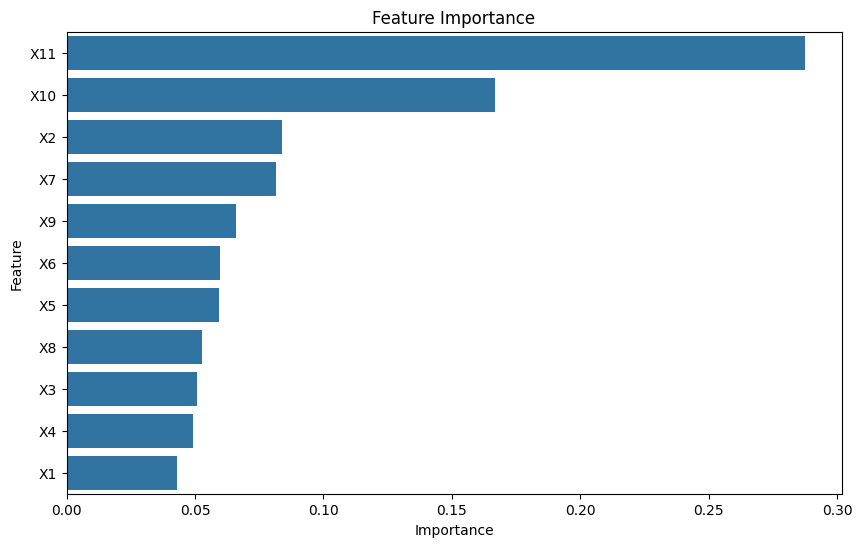

In [9]:
import matplotlib.pyplot as plt  # Untuk visualisasi
import seaborn as sns  # Untuk visualisasi yang lebih baik

# Mengambil feature importance dari model
importance = model.feature_importances_  # Mendapatkan nilai penting fitur
features = X.columns  # Mendapatkan nama fitur

# Membuat DataFrame untuk visualisasi
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})  # Membuat DataFrame
importance_df = importance_df.sort_values(by='Importance', ascending=False)  # Mengurutkan berdasarkan pentingnya fitur

# Visualisasi
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
sns.barplot(x='Importance', y='Feature', data=importance_df)  # Membuat bar plot
plt.title('Feature Importance')  # Judul plot
plt.show()  # Menampilkan plot

Insights:
Dengan visualisasi ini, kita dapat mengidentifikasi fitur-fitur yang paling penting dan mungkin perlu fokus lebih dalam analisis atau pengolahan lebih lanjut.

6. Visualisasi Struktur Pohon

<Figure size 2000x1000 with 0 Axes>

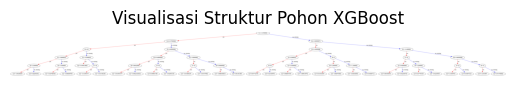

In [10]:
# Visualisasi struktur pohon
from xgboost import plot_tree  # Untuk memplot pohon

plt.figure(figsize=(20, 10))  # Mengatur ukuran gambar
plot_tree(model, num_trees=0)  # Memplot pohon pertama
plt.title('Visualisasi Struktur Pohon XGBoost')  # Judul plot
plt.show()  # Menampilkan plot

Insights:
Dengan melihat struktur pohon, kita dapat memahami logika di balik prediksi model dan bagaimana fitur berinteraksi satu sama lain.

7. Learning Curve

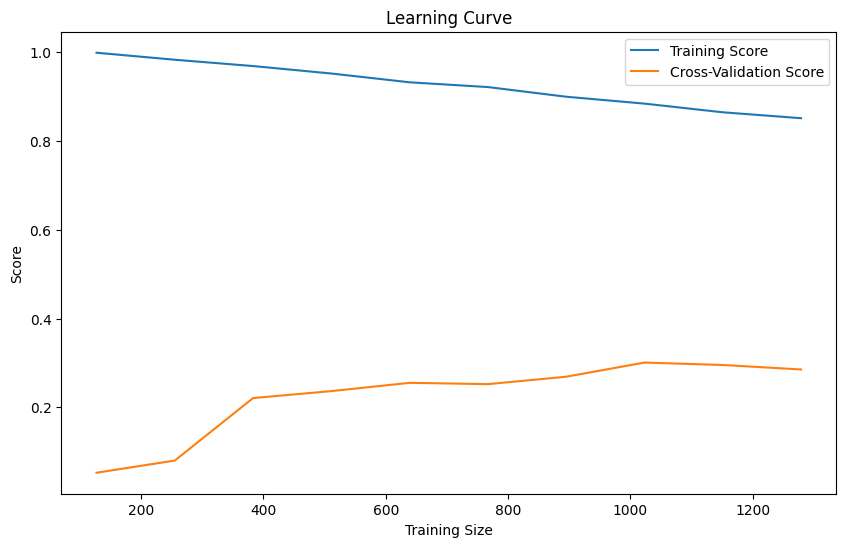

In [12]:
from sklearn.model_selection import learning_curve  # Untuk learning curve
import numpy as np  # Mengimpor NumPy untuk manipulasi array

# Menghitung learning curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))  # Menghitung learning curve

# Menghitung rata-rata dan deviasi standar
train_scores_mean = train_scores.mean(axis=1)  # Rata-rata skor pelatihan
test_scores_mean = test_scores.mean(axis=1)  # Rata-rata skor pengujian

# Visualisasi learning curve
plt.figure(figsize=(10, 6))  # Mengatur ukuran gambar
plt.plot(train_sizes, train_scores_mean, label='Training Score')  # Plot skor pelatihan
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')  # Plot skor validasi silang
plt.title('Learning Curve')  # Judul plot
plt.xlabel('Training Size')  # Label sumbu X
plt.ylabel('Score')  # Label sumbu Y
plt.legend()  # Menampilkan legenda
plt.show()  # Menampilkan plot

Insights:
Dengan learning curve, kita dapat melihat apakah model kita belajar dengan baik dari data yang diberikan atau jika ada masalah dalam pelatihan.

8. SHAP Values

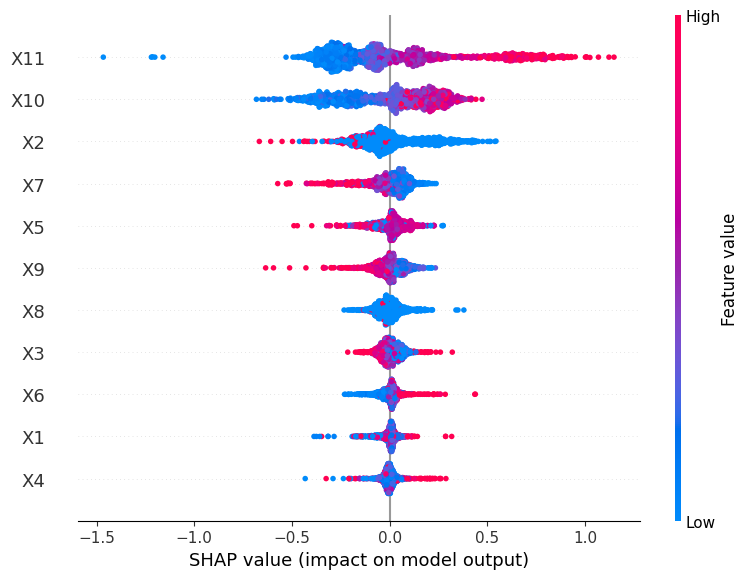

In [13]:
import shap  # Untuk analisis SHAP

# Menghitung SHAP values
explainer = shap.Explainer(model)  # Membuat objek explainer
shap_values = explainer(X)  # Menghitung SHAP values

# Visualisasi SHAP values
shap.summary_plot(shap_values, X)  # Membuat summary plot

Insights:
Dengan visualisasi SHAP, kita dapat memahami bagaimana setiap fitur mempengaruhi prediksi model, yang memberikan wawasan lebih dalam tentang keputusan model.

9. Partial Dependence Plot

<Figure size 1200x600 with 0 Axes>

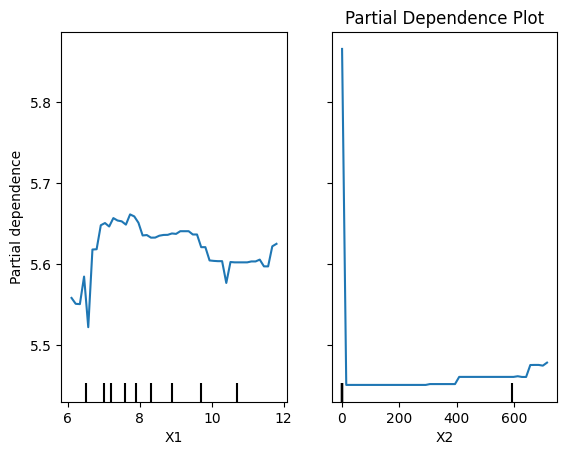

In [17]:
# Mengimpor modul yang diperlukan untuk Partial Dependence Plot
from sklearn.inspection import PartialDependenceDisplay  # Untuk membuat partial dependence plot

# Memilih fitur yang ingin dipetakan
features_to_plot = [0, 1]  # Ganti dengan indeks fitur yang ingin Anda visualisasikan

# Membuat Partial Dependence Plot
plt.figure(figsize=(12, 6))  # Mengatur ukuran gambar
PartialDependenceDisplay.from_estimator(model, X, features_to_plot, grid_resolution=50)  # Membuat partial dependence plot
plt.title('Partial Dependence Plot')  # Judul plot
plt.show()  # Menampilkan plot

Insights:
Dengan menggunakan PDP, Anda dapat melihat apakah hubungan antara fitur dan target bersifat linear, non-linear, atau bahkan kompleks. Ini memberikan wawasan yang berharga tentang bagaimana model membuat prediksi berdasarkan fitur yang ada.